# Кредитный скоринг

### Импорт необходимых библиотек

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, make_scorer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

### Импорт train и test датасетов

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Для начала, визуализируем датасет обучающей выборки и рассмотрим его чуть более подробно для поиска каких-либо закономерностей.

In [3]:
df_train

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.00,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,5,35000,34,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0.0,0,0,3,0.0,0,733,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,60,NaN,0
23112,6697212,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,...,9500.0,5,0.00,1,0,5,20000,7,NaN,0
23113,6697215,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,...,0.0,0,0.00,0,0,4,35000,94,NaN,0
23114,6697264,0.0,3,52080,0,7000.0,18132,15,0.0,5783.65,...,0.0,13,0.00,0,1,3,35000,46,NaN,0


In [4]:
df_train.describe()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
count,2.311600e+04,2.311600e+04,23116.000000,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,2.311600e+04,...,23116.000000,23116.000000,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,7269.000000,23116.000000
mean,6.060602e+06,4.424794e+04,1.284262,1.653574e+05,3.760642,4.070925e+03,1.284212e+05,2615.988925,10672.104919,8.414683e+04,...,1107.137568,3.474087,4.878172e+03,0.118576,1.080637,3.433250,39363.189998,47.632203,0.270051,0.314458
std,3.678480e+05,1.006016e+05,2.373415,4.788942e+05,5.057107,2.689042e+04,3.890718e+05,4228.621029,37246.943546,3.054724e+05,...,7073.931364,9.202313,3.793714e+04,0.466854,2.137757,1.370812,13887.644526,27.615823,0.444016,0.464310
min,5.498546e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.739749e+06,0.000000e+00,0.000000,3.000000e+03,0.000000,0.000000e+00,2.000000e+03,13.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,35000.000000,25.000000,0.000000,0.000000
50%,6.020794e+06,5.000000e+03,0.000000,3.083450e+04,2.000000,0.000000e+00,1.500000e+04,83.500000,0.000000,5.000000e+03,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000,35000.000000,46.000000,0.000000,0.000000
75%,6.445488e+06,4.972685e+04,2.000000,1.357758e+05,5.000000,3.000000e+03,7.500000e+04,2070.500000,0.000000,3.496056e+04,...,0.000000,3.000000,0.000000e+00,0.000000,1.000000,5.000000,50000.000000,70.000000,1.000000,1.000000
max,6.697265e+06,5.739786e+06,25.000000,3.030997e+07,67.000000,1.914581e+06,1.200000e+07,9999.000000,878000.000000,1.150825e+07,...,673495.420000,344.000000,2.878197e+06,10.000000,48.000000,5.000000,65000.000000,99.000000,1.000000,1.000000


Видно, что данные значительно разнятся по своим значениям, что видно в том числе по максимальному значению и по среднему. Преобразованию данных будет посвящено отдельное внимание.

Дополнительно, можно рассмотреть на то, каким образом распределяются объекты в зависимости от категориальных признаков - $work$_$code$ и $region$.

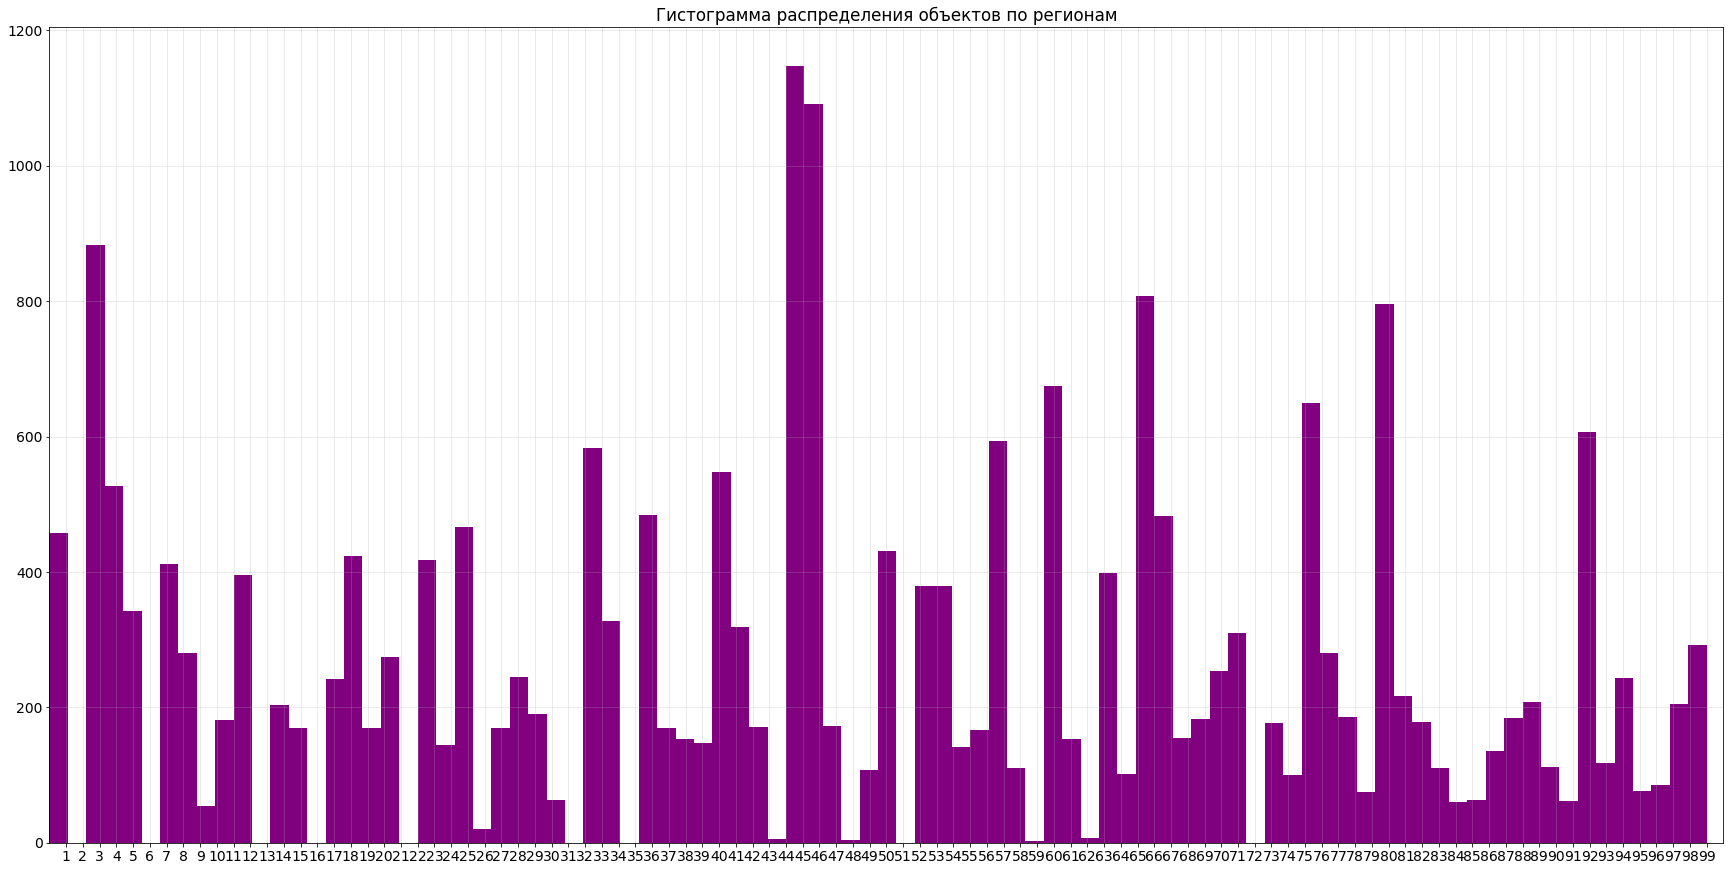

In [5]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 14})
plt.hist(df_train['region'], color='purple', bins=90)
plt.xticks(np.arange(1, 100, 1))
plt.xlim(0, 100)
plt.grid(alpha=0.3)
plt.title('Гистограмма распределения объектов по регионам')
plt.show()

Заметно, что в ряде регионов кредиты берут гораздо больше, нежели чем в других регионах. Более того, в некоторых регионах объектов практически нет или нет вовсе.

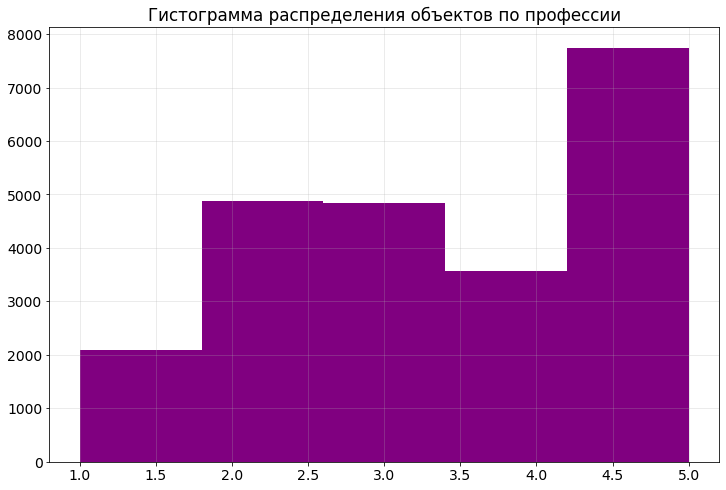

In [6]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})
plt.hist(df_train['work_code'], color='purple', bins=5)
plt.grid(alpha=0.3)
plt.title('Гистограмма распределения объектов по профессии')
plt.show()

Больше всего кредиты берут представители рабочих профессий. В то же время, госслужащие гораздо меньше берут кредиты.

### Преобразование данных

Из таблицы видно, что в выборке присутствует не только множество признаков, но они также разнятся по своему типу и значениям. Необходимо привести данные к одному вещественному типу, в особенности это касается work_code и region, так как это категориальные признаки, а не вещественные. Также следует удалить столбец $order$_$id$, не несущий в себе полезной информации, и убрать пустые значения из столбца $bad$.

###### Удаление order_id

In [7]:
# удаление столбцов order_id из обучающей и тестовой выборки, так как они не несут полезной информации
# (каждый объект выборок уникален, то есть в выборке не присутствует несколько строк, относящихся к одному объекту; 
# дополнительно доказано ниже)
print('Количество строк (объектов) в обучающей и тестовой выборках: ', 
      df_train.shape[0], ', ', df_test.shape[0], sep='')
print('Количество уникальных объектов в столбце order_id для обучающей и тестовой выборок: ', 
      df_train['order_id'].nunique(), ', ', df_test['order_id'].nunique(), sep='')

df_train.drop(columns=['order_id'], inplace=True)
df_test.drop(columns=['order_id'], inplace=True)

Количество строк (объектов) в обучающей и тестовой выборках: 23116, 1218
Количество уникальных объектов в столбце order_id для обучающей и тестовой выборок: 23116, 1218


In [8]:
df_train.head(5)

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,0.0,0,40364,0,0.0,3000,560,0.0,0.0,0,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,0,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,0,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,0,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,0.0,0,0,1,0.0,0,9999,0.0,0.0,0,...,0.0,0,0.00,0,0,5,35000,34,NaN,0


###### Удаление region

В процессе обучения и выбора модели было замечено, что качество алгоритмов не меняется, в некоторых случаях даже несколько повышается в случае, если исключить признак $region$ из выборки. В целом, это объясняется и тем, что данный признак не несет в себя существенно полезной информации, так как гораздо важнее признаки, показывающие кредитную историю объекта или же его заработную плату. Более того, если включать данный признак в выборку, то для его корректного обозначения придется использовать преобразование, так как это категориальный признак, что дополнительно будет увеличивать время обучения.

In [9]:
df_train.drop(columns=['region'], inplace=True)
df_test.drop(columns=['region'], inplace=True)

###### Замена NaN значений в столбце $"$$bad$$"$ на число $2$

In [10]:
# как видно из информации о выборке ниже, пустые значения имеются только в столбце bad, эти значения будут
# заменены на "2", чтобы в дальнейшем можно было проводить мультиклассовую классификацию 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cred_sum_cc_all               23116 non-null  float64
 1   mfo_inqs_count_month          23116 non-null  int64  
 2   all_closed_creds_sum_all      23116 non-null  int64  
 3   bank_inqs_count_quarter       23116 non-null  int64  
 4   cred_max_overdue_max_ly       23116 non-null  float64
 5   all_active_creds_sum_all      23116 non-null  int64  
 6   mfo_last_days_all             23116 non-null  int64  
 7   cred_sum_cc_ly                23116 non-null  float64
 8   cred_sum_debt_all_all         23116 non-null  float64
 9   all_closed_creds_sum_ly       23116 non-null  int64  
 10  mfo_cred_mean_sum_3lm         23116 non-null  float64
 11  delay_more_sum_all            23116 non-null  int64  
 12  all_creds_count_all           23116 non-null  int64  
 13  c

In [11]:
df_train['bad'].fillna(2, inplace=True)
df_test['bad'].fillna(2, inplace=True)

In [12]:
df_train.head(5)

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,bad,approved
0,0.0,0,40364,0,0.0,3000,560,0.0,0.0,0,...,529,0.0,0,0.00,0,0,3,50000,2.0,0
1,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,0,...,0,0.0,0,0.00,0,0,3,35000,2.0,0
2,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,0,...,0,0.0,0,0.00,0,2,3,35000,2.0,0
3,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,0,...,0,0.0,0,4923.97,0,0,5,35000,2.0,0
4,0.0,0,0,1,0.0,0,9999,0.0,0.0,0,...,0,0.0,0,0.00,0,0,5,35000,2.0,0


###### One-hot-encoding категориального признака work_code

In [13]:
df_train['work_code'] = df_train['work_code'].astype('str')
df_test['work_code'] = df_test['work_code'].astype('str')
encoder = OneHotEncoder()
encoded_work_code = encoder.fit_transform(np.expand_dims(df_train['work_code'], axis=1)).toarray()
encoded_work_test = encoder.transform(np.expand_dims(df_test['work_code'], axis=1)).toarray()

###### Разеделение выборки на признаки и целевые переменные, нормализация вещественных признаков

In [14]:
X_train = df_train.iloc[:, 0:len(df_train.columns) - 2]
X_test = df_test.iloc[:, 0:len(df_test.columns) - 2]
X_train.drop(columns=['work_code'], inplace=True)
X_test.drop(columns=['work_code'], inplace=True)
# в случае с целевыми переменными, то первой из них будет колонка approved,
# так как она отвечает за последующее выполнение второй целевой переменной - bad
y_train_1 = df_train['approved']
y_train_2 = df_train['bad']
y_test_1 = df_test['approved']
y_test_2 = df_test['bad']

In [15]:
X_train

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,month_income
0,0.0,0,40364,0,0.0,3000,560,0.0,0.00,0,0.0,2,3,529,0.0,0,0.00,0,0,50000
1,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,0,0.0,10,3,0,0.0,0,0.00,0,0,35000
2,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,0,0.0,18,4,0,0.0,0,0.00,0,2,35000
3,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,0,0.0,8,5,0,0.0,0,4923.97,0,0,35000
4,0.0,0,0,1,0.0,0,9999,0.0,0.00,0,0.0,11,1,0,0.0,0,0.00,0,0,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,0.0,0,0,3,0.0,0,733,0.0,0.00,0,0.0,1,1,0,0.0,0,0.00,0,0,35000
23112,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,25400,8000.0,1,9,998,9500.0,5,0.00,1,0,20000
23113,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,0,0.0,8,8,394,0.0,0,0.00,0,0,35000
23114,0.0,3,52080,0,7000.0,18132,15,0.0,5783.65,52080,5132.0,4,18,505,0.0,13,0.00,0,1,35000


Для нормализации вещественных признаков будет использоваться метод стандартизации, представляющий собой вычитание из признака среднего значения и деления итога на дисперсию признака.

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### Добавление столбцов с work_code к обучающей выборке

In [17]:
X_train = np.hstack((X_train, encoded_work_code))
X_test = np.hstack((X_test, encoded_work_test))

In [18]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.439843,-0.541115,-0.261010,-0.743651,-0.151393,-0.322367,-0.486218,-0.286529,-0.275471,-0.294469,...,-0.377531,-0.128588,-0.253995,-0.505511,0.765936,0.0,0.0,1.0,0.0,0.0
1,-0.424932,-0.541115,-0.296317,-0.743651,-0.151393,-0.330078,1.746000,-0.286529,-0.275471,-0.294469,...,-0.377531,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,1.0,0.0,0.0
2,-0.439842,-0.541115,-0.307712,-0.150414,-0.151393,-0.304378,1.746000,-0.286526,-0.242737,-0.294469,...,-0.377531,-0.128588,-0.253995,0.430069,-0.314185,0.0,0.0,1.0,0.0,0.0
3,-0.390141,-0.541115,0.308822,-0.743651,-0.151393,-0.330078,1.746000,-0.286529,-0.275471,-0.294469,...,-0.377531,0.001207,-0.253995,-0.505511,-0.314185,0.0,0.0,0.0,0.0,1.0
4,-0.439843,-0.541115,-0.345297,-0.545905,-0.151393,-0.330078,1.746000,-0.286529,-0.275471,-0.294469,...,-0.377531,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,-0.439843,-0.541115,-0.345297,-0.150414,-0.151393,-0.330078,-0.445306,-0.286529,-0.275471,-0.294469,...,-0.377531,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,1.0,0.0,0.0
23112,-0.439843,-0.119772,-0.292257,-0.150414,0.201901,-0.284455,-0.607064,-0.286529,-0.275471,-0.045728,...,0.165822,-0.128588,1.888047,-0.505511,-1.394305,0.0,0.0,0.0,0.0,1.0
23113,-0.429902,-0.541115,-0.210630,-0.348160,-0.151393,-0.327508,-0.520746,-0.286529,-0.275471,-0.294469,...,-0.377531,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,0.0,1.0,0.0
23114,-0.439843,0.722914,-0.236545,-0.743651,0.108929,-0.283474,-0.615105,-0.286529,-0.256537,0.215548,...,1.035187,-0.128588,-0.253995,-0.037721,-0.314185,0.0,0.0,1.0,0.0,0.0


Таким образом, обучающая и тестовая выборки были соотвествующим образом оформлены и подготовлены для передачи на обучение и тестирование модели.

### Выбор наилучшего классификатора для целевой переменной №1

Целевая переменная №1 - это статус выдачи кредита или колонка "approved" выборки.

Перед нами задача бинарной классификации, для которой существуют множество различных алгоритмов и их композиций, способных решать данную проблему. Таким образом, можно составить список нескольких алгоритмов для последующей кросс-валидации и выявления наилучшего алгоритма по оценке качества. В данном случае были выбраны Логистическая регрессия, метод опорных векторов и Случайный лес.

######  Выбор классификатора

In [130]:
algos = [LogisticRegression(), SVC(), SGDClassifier(), RandomForestClassifier()]

Рассмотрим, какую оценку качества $f$-$меры$, учитывающей как полноту, так и точность, покажут алгоритмы с параметрами по умолчанию. Оценка на обучении будет проводиться при помощи кросс-валидации с 5 фолдами (стандартный параметр)

In [20]:
# на исполнение кода может понадобиться некоторое время
scores_train = []
scores_test = []
i = 0
for algo in algos:
    score = cross_val_score(algo, X_train, y_train_1, scoring='f1')
    algo.fit(X_train, y_train_1)
    score_test = f1_score(y_test_1, algo.predict(X_test))
    scores_train.append((i, score.mean()))
    scores_test.append((i, score_test))
    i += 1

In [21]:
for i, value in enumerate(scores_train):
    print(f'Оценка качества {str(algos[i])} на обучении равна {round(value[1], 2)}')
    print(f'Оценка качества {str(algos[i])} на тесте равна {round(scores_test[i][1], 2)}')

Оценка качества LogisticRegression() на обучении равна 0.75
Оценка качества LogisticRegression() на тесте равна 0.62
Оценка качества SVC() на обучении равна 0.79
Оценка качества SVC() на тесте равна 0.66
Оценка качества SGDClassifier() на обучении равна 0.77
Оценка качества SGDClassifier() на тесте равна 0.64
Оценка качества RandomForestClassifier() на обучении равна 0.84
Оценка качества RandomForestClassifier() на тесте равна 0.69


В итоге, наилучший результат показал Случайный лес, который и будет использоваться далее для предсказаний целевой переменной №1 "approved".

Теперь можно попытаться дополнительно увеличить качество модели.

###### Работа со Случайным лесом

Основной параметр, который можно было бы изменить у Случайного леса - это количество деревьев.

In [22]:
# на исполнение кода может понадобиться некоторое время
n_trees = np.arange(100, 501, 100)
scores_forest = []
scores_forest_test = []
for tree in n_trees:
    randforest = RandomForestClassifier(n_estimators=tree, random_state=241)
    score = cross_val_score(randforest, X_train, y_train_1, scoring='f1')
    randforest.fit(X_train, y_train_1)
    score_test = f1_score(y_test_1, randforest.predict(X_test))
    scores_forest.append(score.mean())
    scores_forest_test.append(score_test)

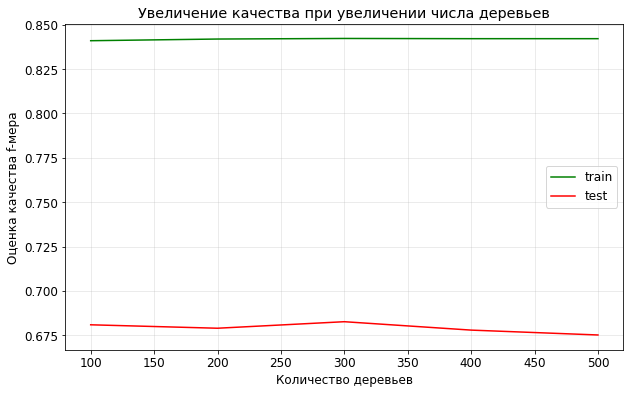

In [23]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 12})
plt.plot(n_trees, scores_forest, 'g')
plt.plot(n_trees, scores_forest_test, 'r')
plt.grid(alpha=0.3)
plt.xlabel('Количество деревьев')
plt.ylabel('Оценка качества f-мера')
plt.title('Увеличение качества при увеличении числа деревьев')
plt.legend(['train', 'test'])
plt.show()

Заметно, что качество существенным образом не изменяется и достигает хорошего значения уже при 100 деревьях.

###### Оценка качества классификатора №1

Теперь можно детальнее рассмотреть различные оценки качества, которые показывает выбранный классификатор - __случайный лес__. Оценки качества: полнота, точность, f-мера. Одна из особенностей случайного леса состоит в том числе в том, что он может предсказывать не только метки класса, но и вероятности отнесения к той или иной метке класса, то есть дополнительно можно рассмотреть и оценку качества, основанную на кривых $roc-auc$ и $pr-rc$.

In [35]:
classificator1 = RandomForestClassifier(n_estimators=100, random_state=241)

In [36]:
classificator1.fit(X_train, y_train_1)

RandomForestClassifier(random_state=241)

In [37]:
# полнота и точность
recall = recall_score(y_test_1, classificator1.predict(X_test))
precision = precision_score(y_test_1, classificator1.predict(X_test))
print(f'Оценка качества "полнота" равна {round(recall, 2)}')
print(f'Оценка качества "точность" равна {round(precision, 2)}')

Оценка качества "полнота" равна 0.64
Оценка качества "точность" равна 0.73


Оценка полноты иллюстрирует, что $64\%$ всех объектов класса 1 были найдены классификатором. Точность же показывает, что $73\%$ всех объектов класса 1 классификатор определил верно как данный класс.
Другими словами, полученный классификатор более хорошо предсказывает сам результат заявки - одобрить ли ее или нет.

In [40]:
# f-мера
f_value = f1_score(y_test_1, classificator1.predict(X_test))
print(f'Оценка качества "f-мера" равна {round(f_value, 2)}')

Оценка качества "f-мера" равна 0.68


$F-мера$ - гармоническое среднее полноты и точности для более корректного объединения двух метрик в одну.

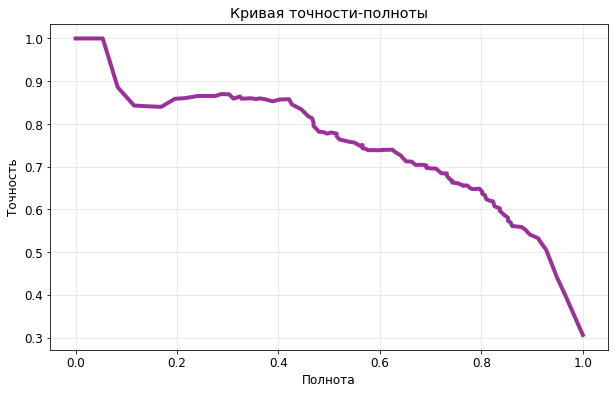

In [47]:
# pr-rc кривая
precision, recall, _ = precision_recall_curve(y_test_1, classificator1.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(recall, precision, color='purple', lw=4.0, alpha=0.8)
plt.grid(alpha=0.3)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая точности-полноты')
plt.show()

Как видно из полученной кривой, мы могли бы "подогнать" классификатор для того, чтобы более лучшим образом учитывать либо метрику полноты, либо точности. В данном же случае был выбран вариант такого классификатора, который бы показывал хороший результат и полноты, и точности.

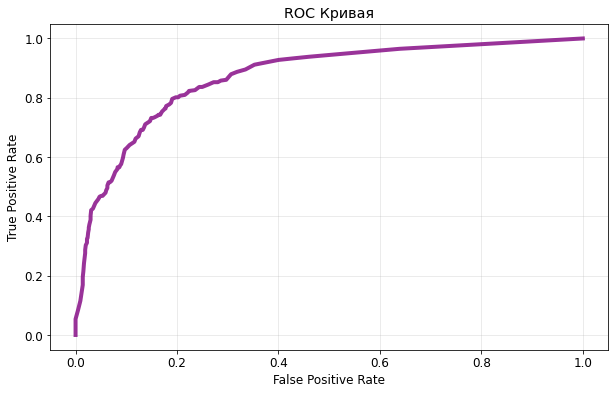

In [54]:
# roc-кривая
fpr, tpr, _ = roc_curve(y_test_1, classificator1.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='purple', lw=4.0, alpha=0.8)
plt.grid(alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Кривая')
plt.show()

ROC кривая иллюстрирует то, что полученный классификатор отлично справляется со своей задачей и правильно относит большинство объектов (True Positive Rate) при малом значении тех объектов, которых классификатор ошибочно причислил к классу 1 (False Positive Rate).

Это дополнительно подтверждается полученной количественной оценкой ROC-кривой.

In [55]:
roc_score = roc_auc_score(y_test_1, classificator1.predict_proba(X_test)[:,1])
print(f'Оценка качества "площадь под roc-кривой" равна {round(roc_score, 2)}')

Оценка качества "площадь под roc-кривой" равна 0.87


### Выбор наилучшего классификатора для целевой переменной №2

Выбрав первый классификатор для предсказания результата рассмотрения заявки о выдаче кредита (колонка $approved$), следует перейти к выбору второго классификатора. Он будет принимать значения признаков объектов, а также результат предсказания первого классификатора, и на их основе предсказывать значение целевой переменной №2 - просрочку кредита или колонку $bad$ выборки.

Учитывая, что целевая переменная №2 была преобразована в небинарные значения (значения 0 - кредит погашен, 1 - кредит просрочен и 2 - кредит не выдан), понадобится многоклассовый классификатор.

В данном случае, будет использован многоклассовый классификатор "Один-против-всех".

###### Преобразование обучающей и тестовой выборок с учетом колонки $approved$ 

Для начала следует преобразовать выборку в новую, чтобы она включала в себя результат предсказания первого классификатора.

In [117]:
X_train_bad = np.hstack((X_train, np.expand_dims(classificator1.predict(X_train), axis=1)))
X_test_bad = np.hstack((X_test, np.expand_dims(classificator1.predict(X_test), axis=1)))

In [71]:
pd.DataFrame(X_train_bad)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.439843,-0.541115,-0.261010,-0.743651,-0.151393,-0.322367,-0.486218,-0.286529,-0.275471,-0.294469,...,-0.128588,-0.253995,-0.505511,0.765936,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.424932,-0.541115,-0.296317,-0.743651,-0.151393,-0.330078,1.746000,-0.286529,-0.275471,-0.294469,...,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.439842,-0.541115,-0.307712,-0.150414,-0.151393,-0.304378,1.746000,-0.286526,-0.242737,-0.294469,...,-0.128588,-0.253995,0.430069,-0.314185,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.390141,-0.541115,0.308822,-0.743651,-0.151393,-0.330078,1.746000,-0.286529,-0.275471,-0.294469,...,0.001207,-0.253995,-0.505511,-0.314185,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.439843,-0.541115,-0.345297,-0.545905,-0.151393,-0.330078,1.746000,-0.286529,-0.275471,-0.294469,...,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,-0.439843,-0.541115,-0.345297,-0.150414,-0.151393,-0.330078,-0.445306,-0.286529,-0.275471,-0.294469,...,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,1.0,0.0,0.0,0.0
23112,-0.439843,-0.119772,-0.292257,-0.150414,0.201901,-0.284455,-0.607064,-0.286529,-0.275471,-0.045728,...,-0.128588,1.888047,-0.505511,-1.394305,0.0,0.0,0.0,0.0,1.0,0.0
23113,-0.429902,-0.541115,-0.210630,-0.348160,-0.151393,-0.327508,-0.520746,-0.286529,-0.275471,-0.294469,...,-0.128588,-0.253995,-0.505511,-0.314185,0.0,0.0,0.0,1.0,0.0,0.0
23114,-0.439843,0.722914,-0.236545,-0.743651,0.108929,-0.283474,-0.615105,-0.286529,-0.256537,0.215548,...,-0.128588,-0.253995,-0.037721,-0.314185,0.0,0.0,1.0,0.0,0.0,0.0


###### Выбор классификатора

In [62]:
algos = [LogisticRegression(), SVC(), SGDClassifier(), RandomForestClassifier()]

В качестве метрики качества будет также использоваться $f-мера$, которая была преобразована для учета многоклассовой классификации с помощью рассчета взвешенного среднего (для того, чтобы учитывать дисбаланс классов по выборке) по найденным метрикам каждого класса. Оценка на обучении будет проводиться при помощи кросс-валидации с 5 фолдами (стандартный параметр).

In [77]:
scorer = make_scorer(f1_score, average='weighted')

In [78]:
# на исполнение кода может понадобиться некоторое время
scores_train = []
scores_test = []
for i, algo in enumerate(algos):
    score = cross_val_score(OneVsRestClassifier(estimator=algo), X_train_bad, y_train_2, scoring=scorer)
    classifier = OneVsRestClassifier(estimator=algo)
    classifier.fit(X_train_bad, y_train_2)
    score_test = f1_score(y_test_2, classifier.predict(X_test_bad), average='weighted')
    scores_train.append((i, score.mean()))
    scores_test.append((i, score_test))

C:\Users\sasha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sasha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [79]:
for i, value in enumerate(scores_train):
    print(f'Оценка качества {str(algos[i])} на обучении равна {round(value[1], 2)}')
    print(f'Оценка качества {str(algos[i])} на тесте равна {round(scores_test[i][1], 2)}')

Оценка качества LogisticRegression() на обучении равна 0.88
Оценка качества LogisticRegression() на тесте равна 0.74
Оценка качества SVC() на обучении равна 0.87
Оценка качества SVC() на тесте равна 0.74
Оценка качества SGDClassifier() на обучении равна 0.88
Оценка качества SGDClassifier() на тесте равна 0.74
Оценка качества RandomForestClassifier() на обучении равна 0.88
Оценка качества RandomForestClassifier() на тесте равна 0.74


Не смотря на то, что первоначально алгоритм Логистической регрессии не справился с классификацией, что очевидно по появившеся ошибке о неудачной сходимости, по итогам оценки качества все классификаторы показали практически идентичные результаты.

В итоге, для классификатора №2 будет выбран так же случайный лес.

###### Работа с классификатором №2 

Можно выяснить, быть может на классификатор №2 повлияет изменение количества деревьев.

In [86]:
# на исполнение кода может понадобиться некоторое время
n_trees = np.arange(100, 301, 100)
scores_forest = []
scores_forest_test = []
for tree in n_trees:
    randforest = OneVsRestClassifier(RandomForestClassifier(n_estimators=tree, random_state=241))
    score = cross_val_score(randforest, X_train_bad, y_train_2, scoring=scorer, cv=3)
    randforest.fit(X_train_bad, y_train_2)
    score_test = f1_score(y_test_2, randforest.predict(X_test_bad), average='weighted')
    scores_forest.append(score.mean())
    scores_forest_test.append(score_test)

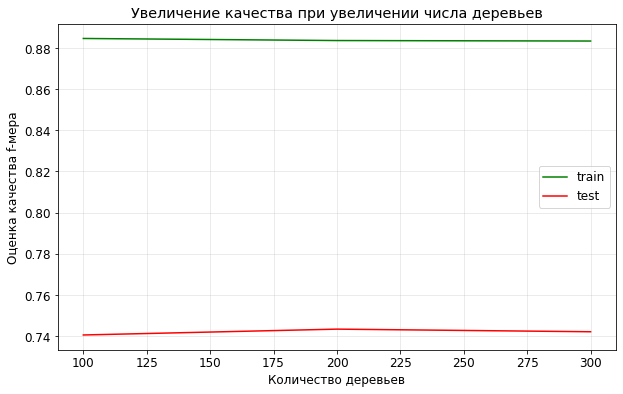

In [87]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 12})
plt.plot(n_trees, scores_forest, 'g')
plt.plot(n_trees, scores_forest_test, 'r')
plt.grid(alpha=0.3)
plt.xlabel('Количество деревьев')
plt.ylabel('Оценка качества f-мера')
plt.title('Увеличение качества при увеличении числа деревьев')
plt.legend(['train', 'test'])
plt.show()

Заметно, что качество также заметно не меняется, как и в случае с классификатором №1. Таким образом, можно использовать случайный лес со 100 решающими деревьями.

###### Оценка качества классификатора №2 

Необходимо рассмотреть оценки качества, которые показывает классификатор №2. Оценки качества: полнота, точность, f-мера а также площадь под roc-кривой. Они будут преобразованы для учета мультиклассовой классификации при помощи взвешенного среднего оценок среди классов.

In [88]:
classificator2 = RandomForestClassifier(n_estimators=100, random_state=241)

In [89]:
classificator2.fit(X_train_bad, y_train_2)

RandomForestClassifier(random_state=241)

In [92]:
recall = recall_score(y_test_2, classificator2.predict(X_test_bad), average='weighted')
precision = precision_score(y_test_2, classificator2.predict(X_test_bad), average='weighted')
print(f'Оценка качества "полнота" равна {round(recall, 2)}')
print(f'Оценка качества "точность" равна {round(precision, 2)}')

Оценка качества "полнота" равна 0.77
Оценка качества "точность" равна 0.74


Оценка полноты иллюстрирует, что $77\%$ всех объектов различных классов были найдены классификатором. Точность же показывает, что $74\%$ всех объектов, относящихся к тому или иному классу, классификатор определил верно как данный класс.
В целом, полученный классификатор показывает хорошие результаты, более того, более настроен на полноту.

In [93]:
# f-мера
f_value = f1_score(y_test_2, classificator2.predict(X_test_bad), average='weighted')
print(f'Оценка качества "f-мера" равна {round(f_value, 2)}')

Оценка качества "f-мера" равна 0.74


In [98]:
roc_score = roc_auc_score(y_test_2, classificator2.predict_proba(X_test_bad), average='weighted', 
                          multi_class='ovr')
print(f'Оценка качества "площадь под roc-кривой" равна {round(roc_score, 2)}')

Оценка качества "площадь под roc-кривой" равна 0.82


Таким образом, классификатор №2 хорошо прогнозирует просрочку выданного кредита. Более того, его можно также использовать для получения вероятности того, что человек просрочит кредит.

### Результаты 

В итоге, были проделаны следующие шаги:
- Была проанализирована первоначальная выборка
- Выборка была преобразована для последующей интерпретации моделью
- Был выбран классификатор №1 для предсказания первой целевой переменной, относящейся к результату выдачи кредита
- Была проведена оценка качества классификатора №1
- Был выбран классификатор №2 для предсказания второй целевой переменной, относящейся к просрочке выданного кредита
- Была проведена оценка качества классификатора №2

Итоговые классификаторы можно использовать для последующего предсказания не только целевых переменных как таковых, но и для предсказания вероятностей отнесения к той или иной целевой переменной. Это может пригодится для того, чтобы действовать в соответствии с политикой банка (более рискованной или менее рискованной) по полученным результатам вероятностей. 